 Importing necessary libraries


In [70]:
!mkdir data/
!wget https://raw.githubusercontent.com/Dnyanesh131/sampleData/main/Concrete_Compressive_Strength.csv -O data/Concrete_Compressive_Strength

mkdir: cannot create directory ‘data/’: File exists
--2024-04-25 18:35:42--  https://raw.githubusercontent.com/Dnyanesh131/sampleData/main/Concrete_Compressive_Strength.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49050 (48K) [text/plain]
Saving to: ‘data/Concrete_Compressive_Strength’

data/Concrete_Compr 100%[===================>]  47.90K  --.-KB/s    in 0.01s   

2024-04-25 18:35:42 (4.34 MB/s) - ‘data/Concrete_Compressive_Strength’ saved [49050/49050]



In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

Reading the concrete compressive strength dataset.

In [72]:
Dnyanesh_df = pd.read_csv('/content/data/Concrete_Compressive_Strength')

In [73]:
Dnyanesh_df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Showing descriptive statistics of the dataset.





In [74]:
Dnyanesh_df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


Displaying information about the dataset.

In [75]:
Dnyanesh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cement                          1030 non-null   float64
 1   Blast Furnace Slag              1030 non-null   float64
 2   Fly Ash                         1030 non-null   float64
 3   Water                           1030 non-null   float64
 4   Superplasticizer                1030 non-null   float64
 5   Coarse Aggregate                1030 non-null   float64
 6   Fine Aggregate                  1030 non-null   float64
 7   Age (day)                       1030 non-null   int64  
 8   Concrete compressive strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Checking for null values in the dataset.




In [76]:

Dnyanesh_df.isnull().sum()

Cement                            0
Blast Furnace Slag                0
Fly Ash                           0
Water                             0
Superplasticizer                  0
Coarse Aggregate                  0
Fine Aggregate                    0
Age (day)                         0
Concrete compressive strength     0
dtype: int64

data having no null values already,now check for missing values

In [77]:
# data having no null values already,now check for missing values
Dnyanesh_df.isna().sum()
col_names =Dnyanesh_df.columns

visualizing missing values

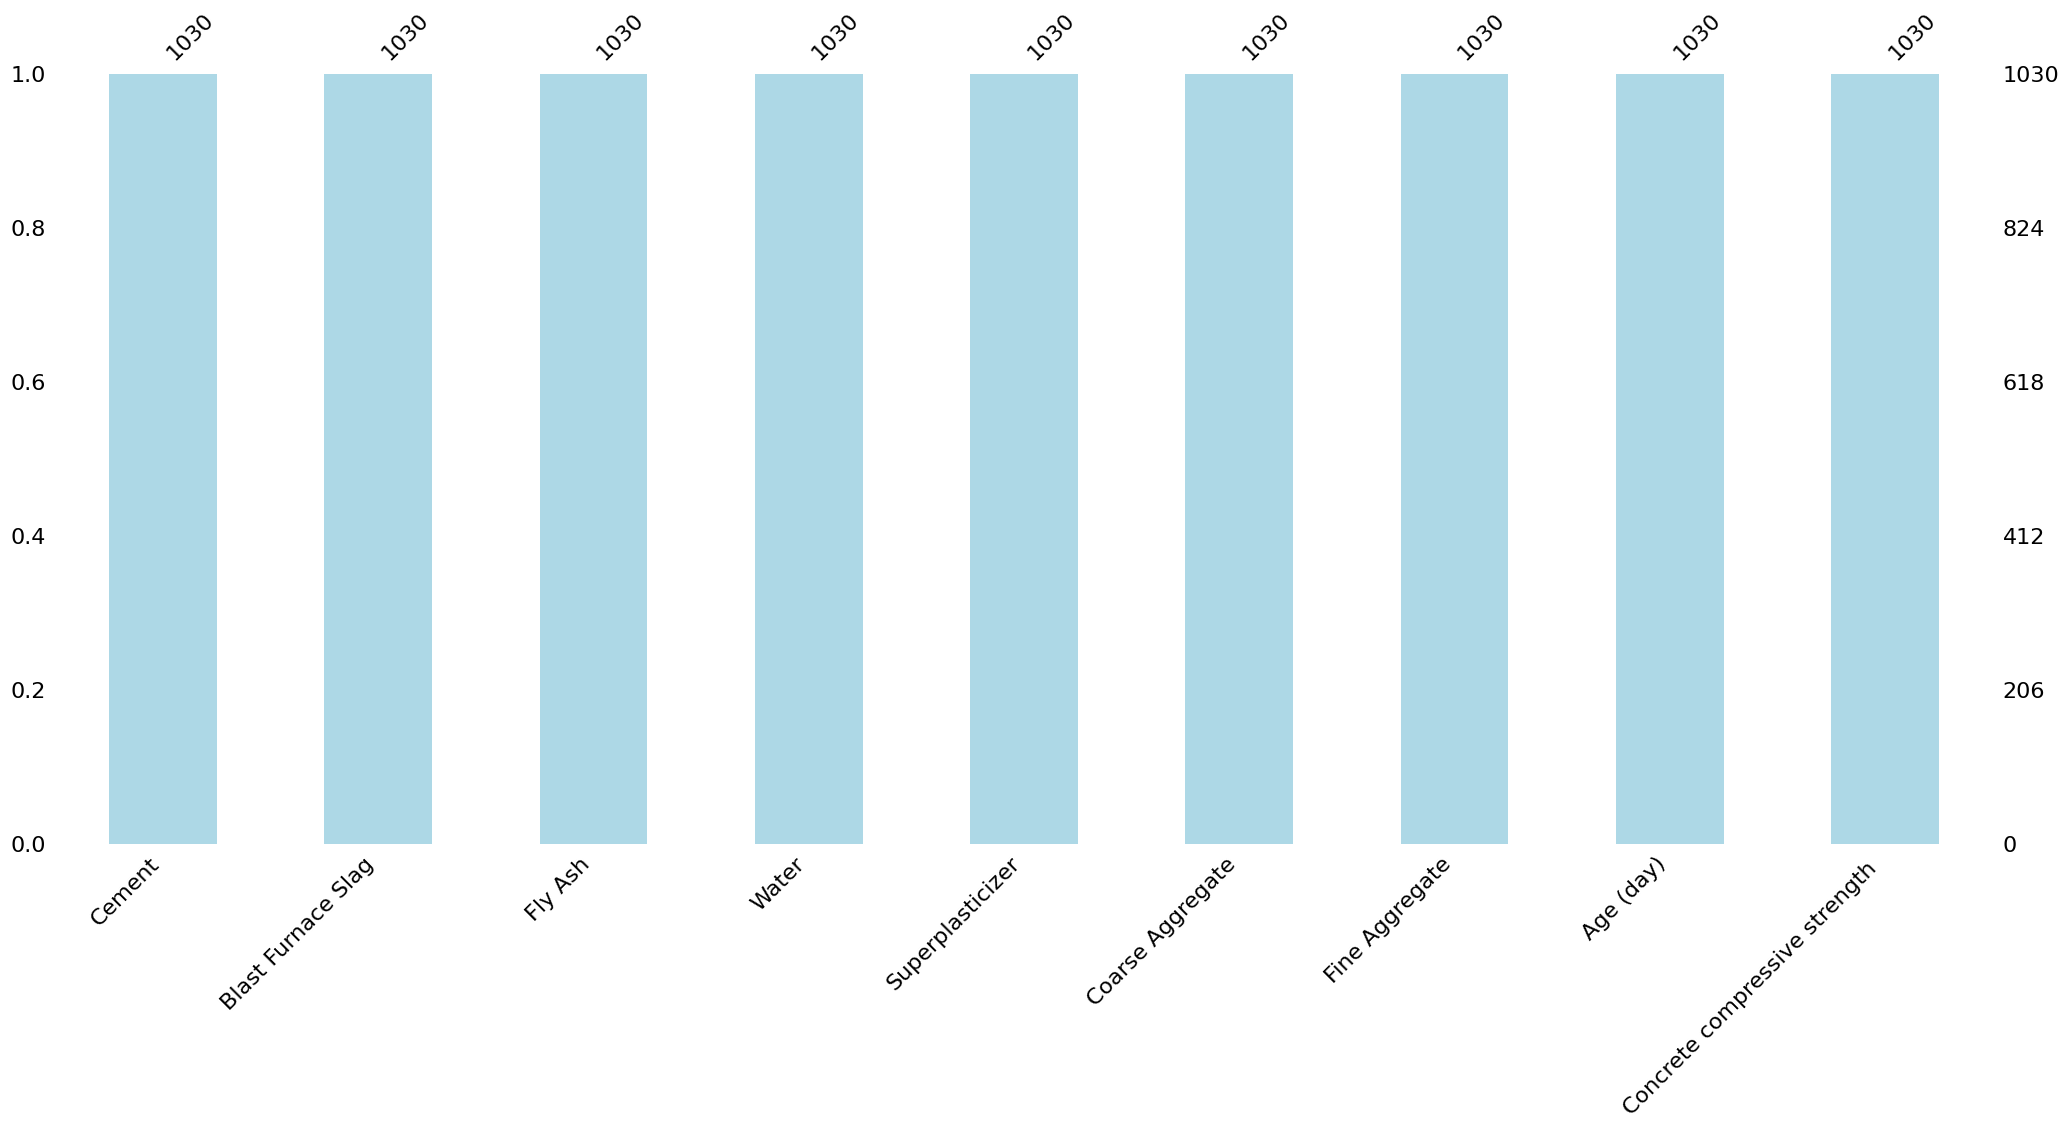

In [78]:
import os

# Create a folder to save figures if it doesn't exist
if not os.path.exists('figures'):
    os.makedirs('figures')



msno.bar(Dnyanesh_df,color='lightblue')
plt.savefig('figures/Visual_missing_value.png')
plt.show()

Analyzing trends and identifying outliers using box plots and dist plots.

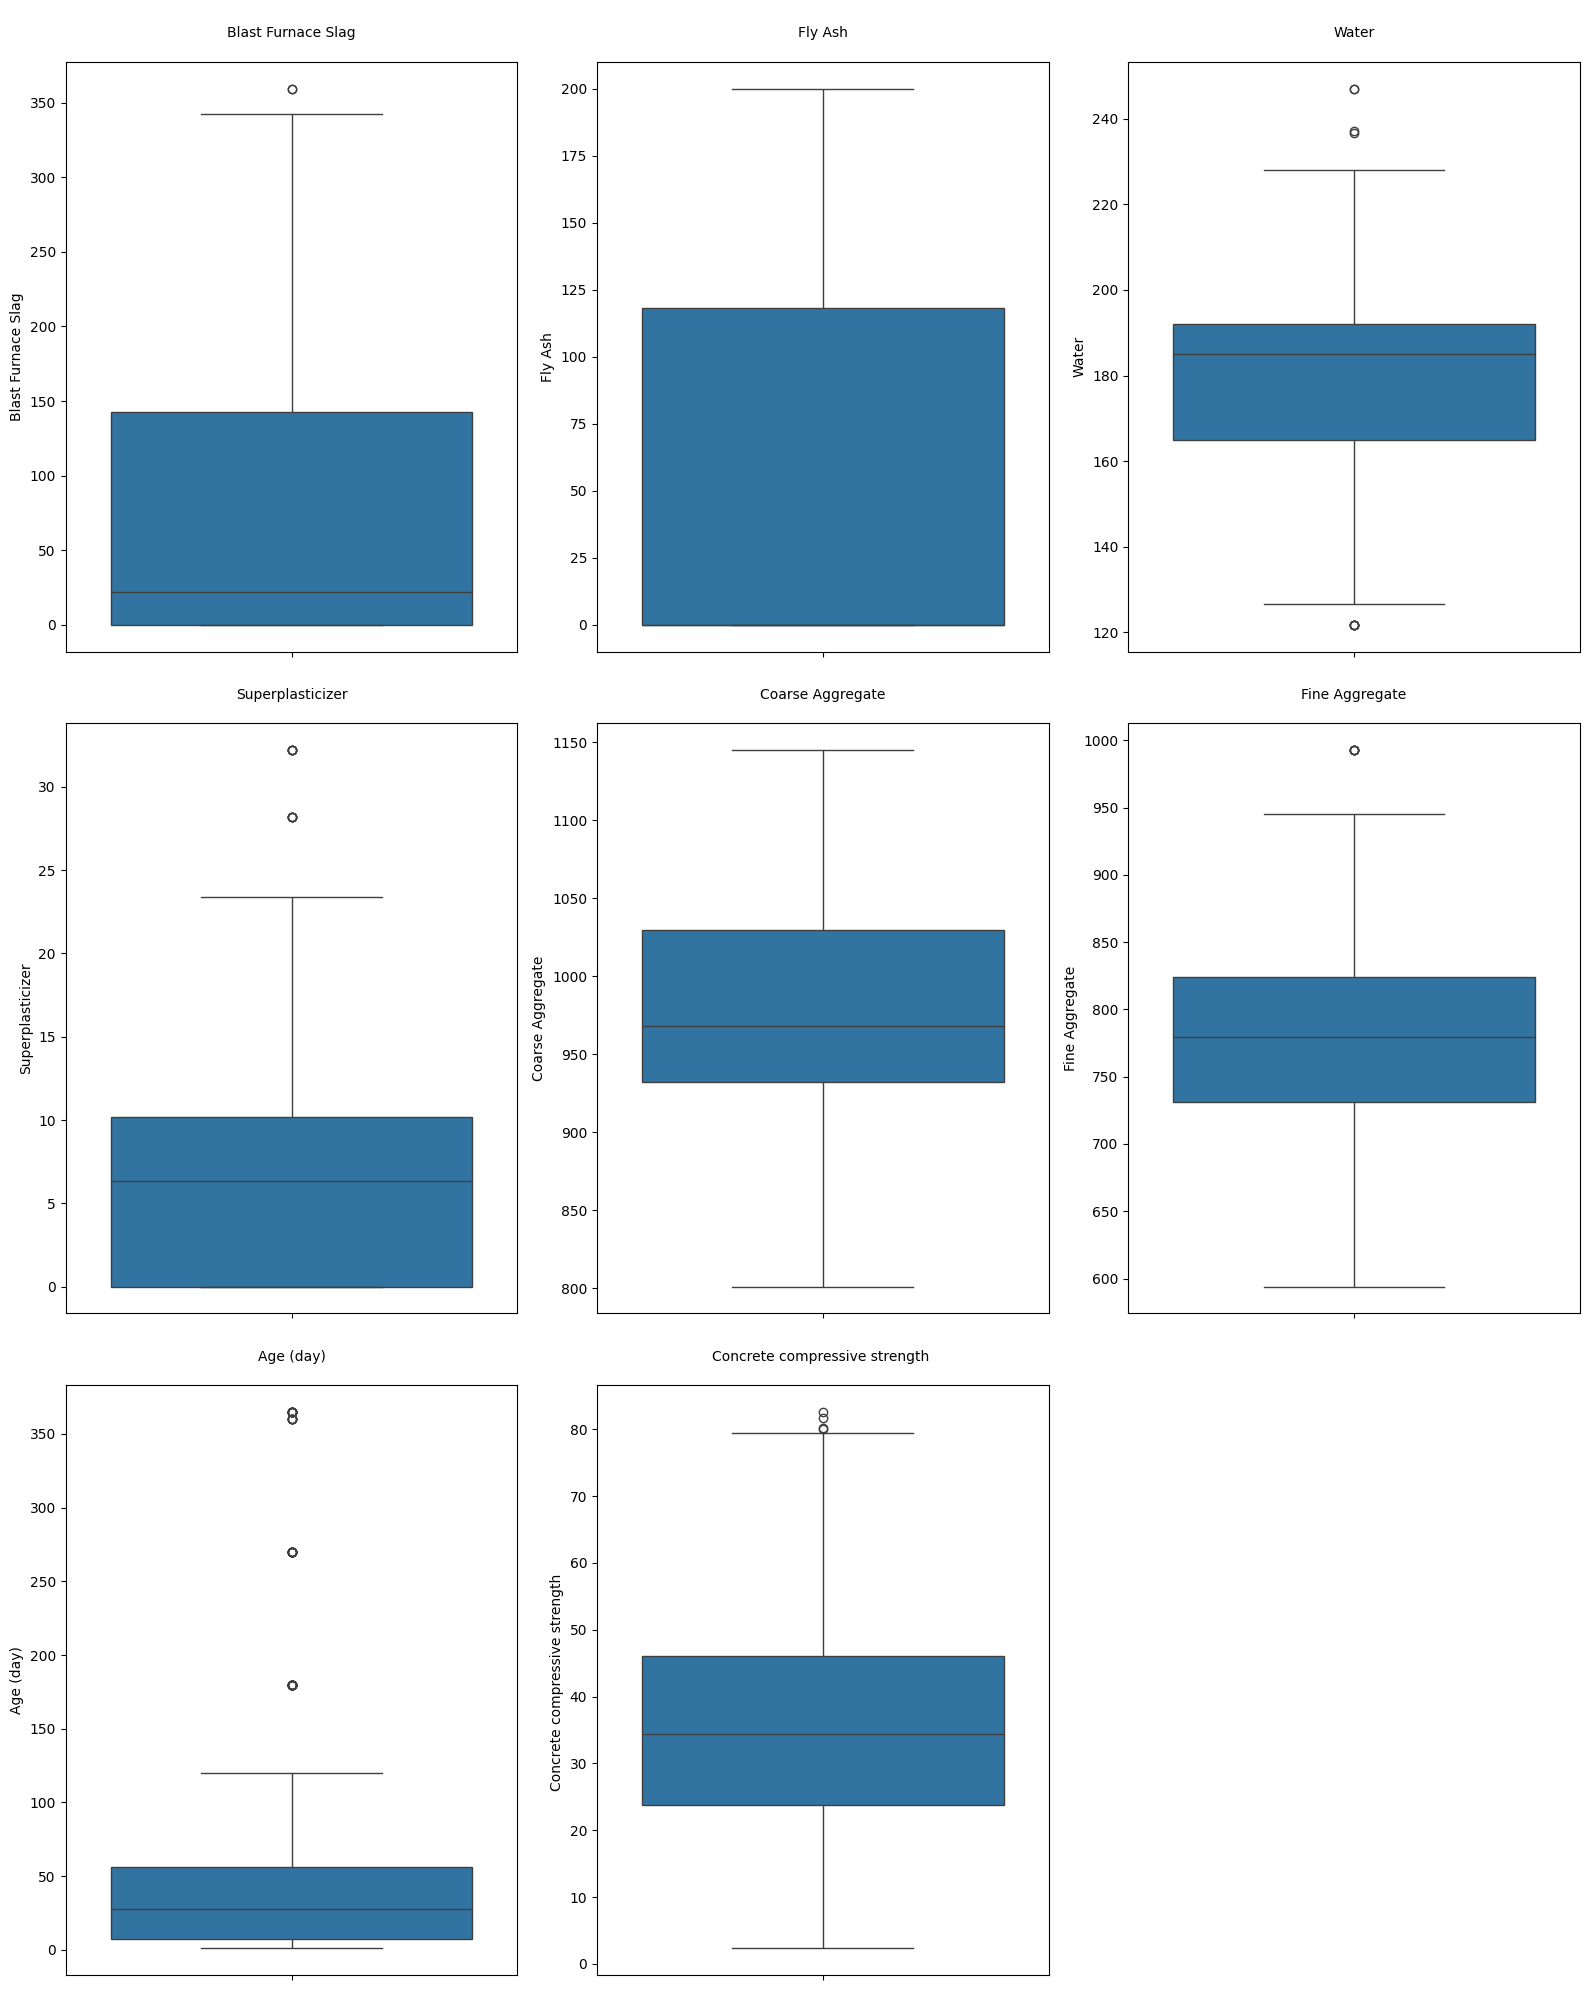

In [79]:
#all fine with data no null values,no missing values
#looking for outliers detection
columns = Dnyanesh_df.columns
plt.figure(figsize=(16,20))
plotNum=1;

for i in range(1,len(columns)):
  if plotNum<=9:
    ax = plt.subplot(3,3,plotNum)
    sns.boxplot(y=columns[i],data = Dnyanesh_df,ax=ax)
    plt.title(f"\n{columns[i]}\n ",fontsize=10)

    plotNum+=1

plt.tight_layout()

plt.savefig('figures/Outlier_Detention_Initial.png')
plt.show()



<ipython-input-80-b7b7b8d2d283>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-80-b7b7b8d2d283>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-80-b7b7b8d2d283>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

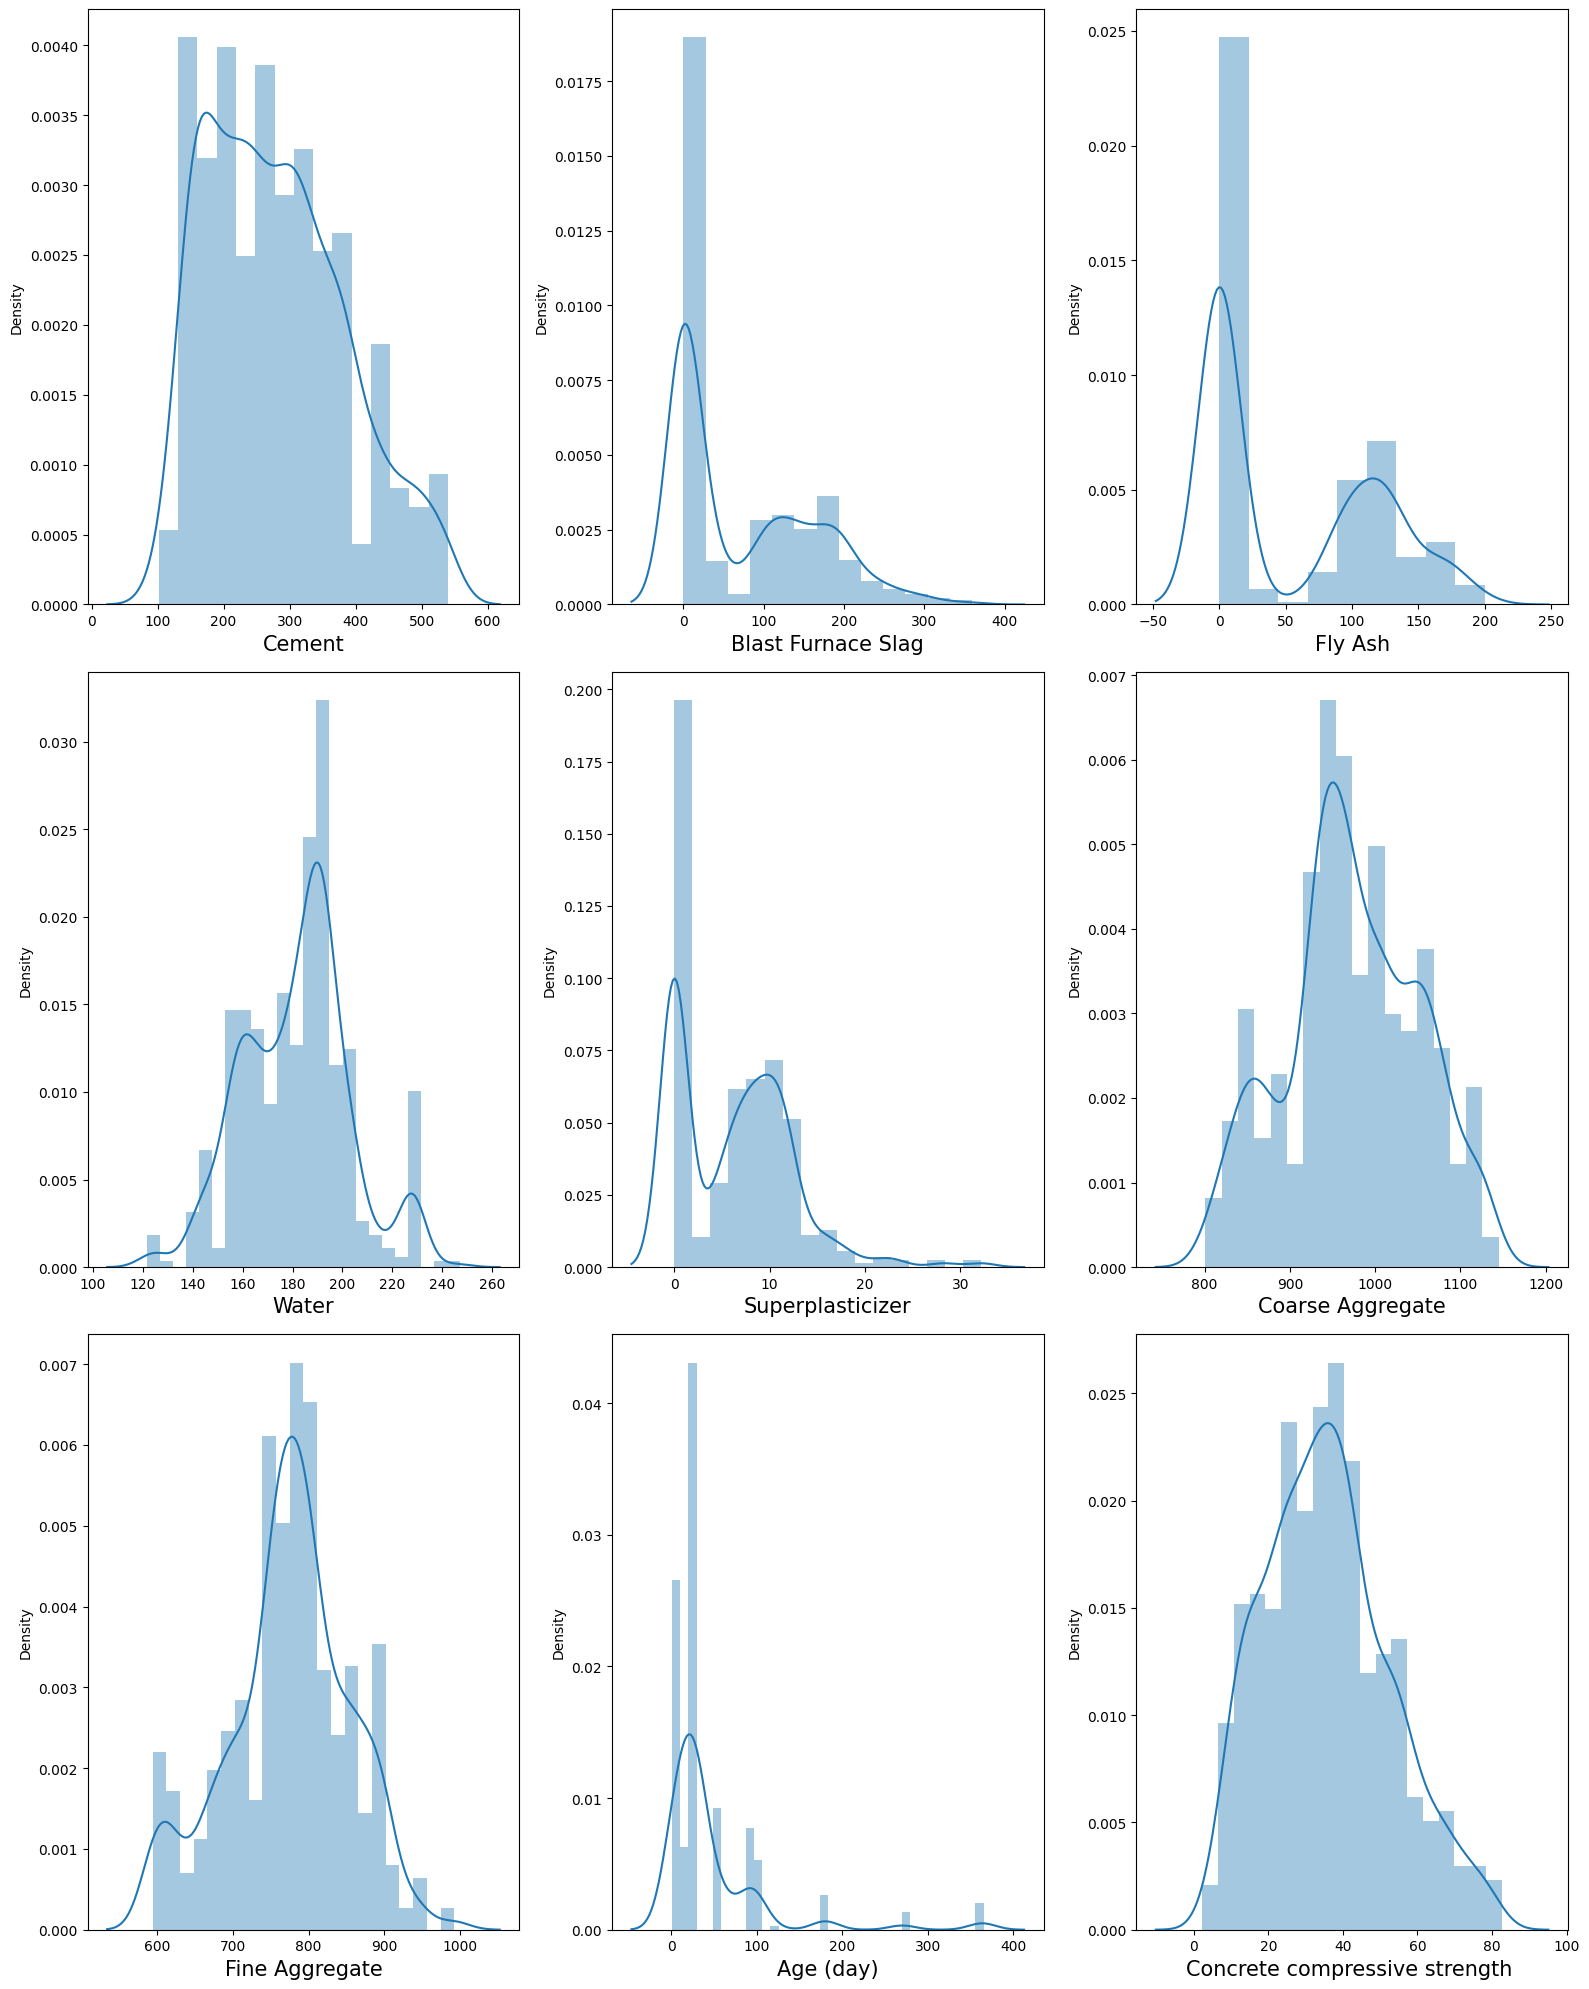

In [80]:
#as we can see ,there are some outliers are present in water, Superplasticizer and Age columns.
plt.figure(figsize = (16, 20))
plotNum = 1

for col in Dnyanesh_df.columns:
    if plotNum <= 9:
        ax = plt.subplot(3, 3, plotNum)
        sns.distplot(Dnyanesh_df[col])
        plt.xlabel(col, fontsize = 15)

    plotNum += 1

plt.tight_layout()
plt.savefig('figures/Outliers_detention_DistPlot.png')
plt.show()

In [81]:
#still plasticizer , age and blast furnace slag showing some outliers , we will look into it in feature extraction part

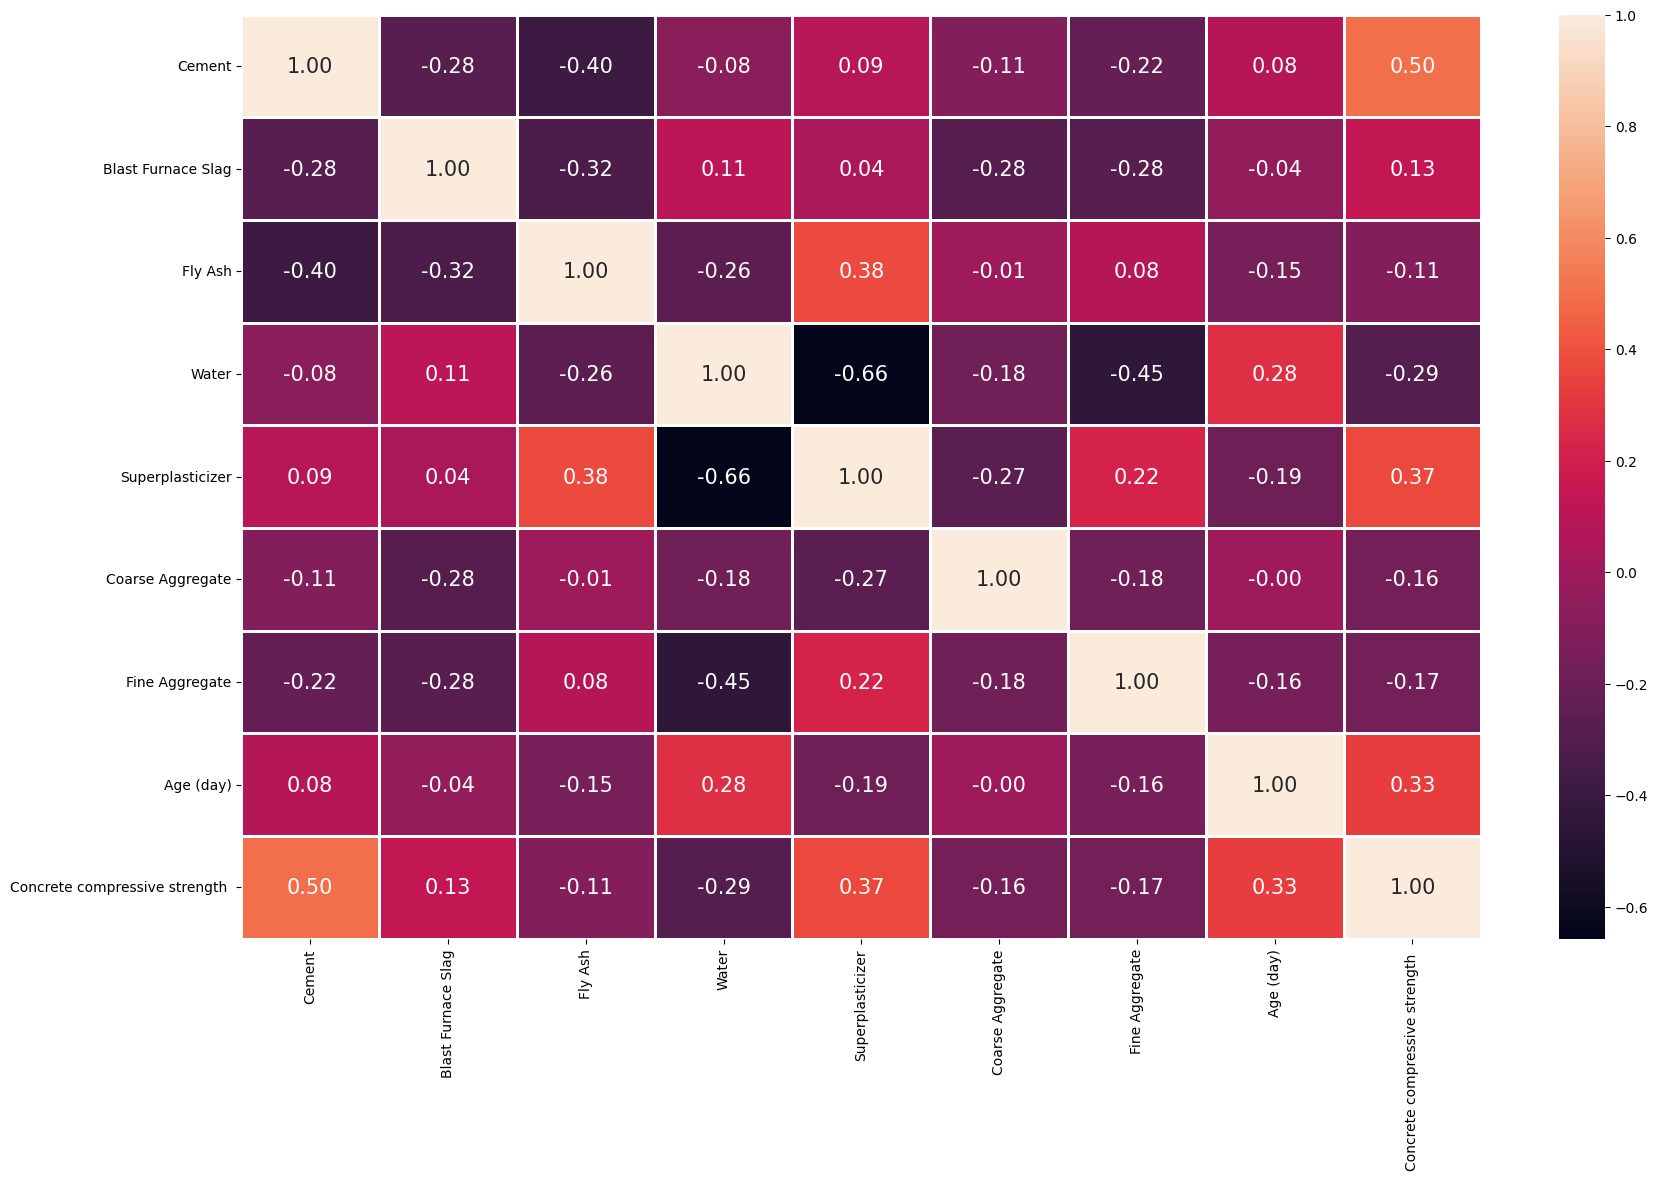

In [82]:
#performing correlation matrix to understand the corelation among the features varaible
plt.figure(figsize = (20, 12))
sns.heatmap(Dnyanesh_df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'white')
plt.savefig('figures/Correlation_matrix.png')
plt.show()

In [83]:
from scipy import stats
def remove_outliers_zscore(column):
    z_scores = stats.zscore(column)
    outlier_indices = abs(z_scores) > threshold
    column[outlier_indices] = column.mean()
    return column

In [84]:
threshold=3  # change this value as u want
# Apply the function to all numeric columns in the DataFrame
df_no_outliers = Dnyanesh_df.apply(remove_outliers_zscore, axis=0)
#check after outlier detection and removal some times while dropping or replacing nan values may be created.
#change to iqr code and check urself
df_no_outliers.isna().sum()

Cement                            0
Blast Furnace Slag                0
Fly Ash                           0
Water                             0
Superplasticizer                  0
Coarse Aggregate                  0
Fine Aggregate                    0
Age (day)                         0
Concrete compressive strength     0
dtype: int64

In [85]:

from sklearn.preprocessing import MinMaxScaler

# get the MinMaxScaler
scaler = MinMaxScaler()
"""
we have already done this step above
"""
# Select all numeric columns in the DataFrame
# numeric_columns = df.select_dtypes(include='number').columns
df_scaled = df_no_outliers.copy()
# Fit and transform all numeric columns
df_scaled[col_names] = scaler.fit_transform(df_scaled[col_names])

In [86]:

df_scaled.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,0.409054,0.230371,0.270800,0.517912,0.255134,0.499763,0.450524,0.199213,0.417181
std,0.238601,0.267403,0.319822,0.183599,0.234043,0.226029,0.201143,0.202193,0.208125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.206336,0.000000,0.000000,0.374403,0.000000,0.380814,0.343578,0.033520,0.266301
50%,0.390183,0.069598,0.000000,0.548807,0.265090,0.485465,0.465404,0.150838,0.400050
75%,0.566210,0.450807,0.591054,0.609544,0.430556,0.663953,0.577020,0.249509,0.545732
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


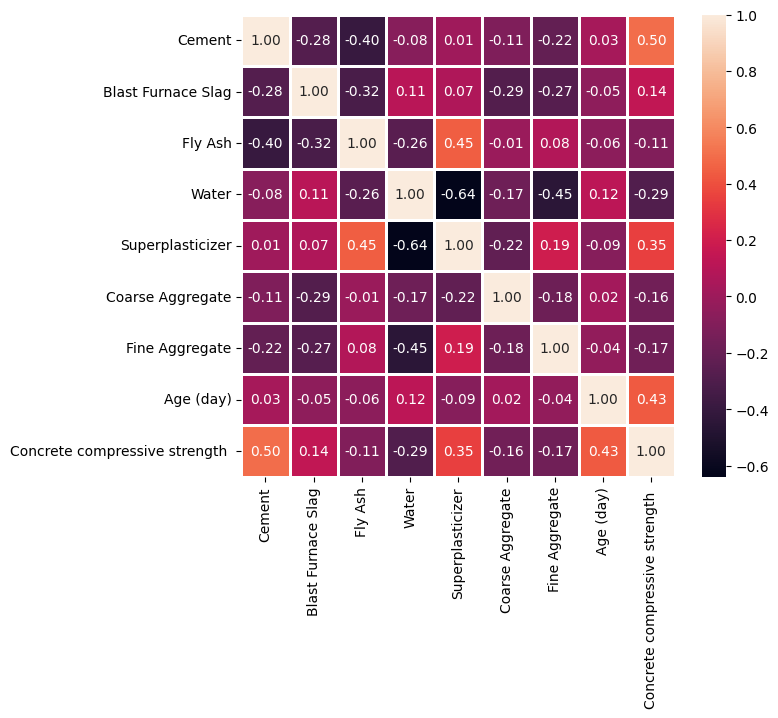

In [87]:
plt.figure(figsize = (7, 6))
sns.heatmap(df_scaled.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 10}, linewidth = 2, linecolor = 'white')
plt.savefig('figures/Corr_matrix_afterScaled.png')
plt.show()

Insights from Correlation Matrix :

Cement and Concrete Compressive Strength: The correlation is 0.50, which is a moderate positive correlation. This indicates that as the amount of cement increases, the compressive strength of the concrete tends to increase as well.

Water and Superplasticizer: There is a strong negative correlation of -0.66. This suggests that the more superplasticizer used, the less water is needed. Superplasticizers are used to enhance the workability of concrete, allowing for a reduction in water content without reducing fluidity.

Fly Ash and Superplasticizer: These have a correlation of 0.38, a moderate positive correlation, implying that fly ash and superplasticizer quantities tend to increase together. Fly ash can improve workability and reduce water content, which might be why it's used in conjunction with superplasticizers.

Age and Concrete Compressive Strength: With a correlation of 0.33, it indicates a positive relationship, albeit not very strong, suggesting that as the concrete ages, its compressive strength tends to increase, which is expected as concrete gains strength over time.

Water and Cement: The correlation is -0.08, which is a very weak negative correlation, suggesting that there is no significant relationship between the amounts of water and cement used in the concrete mix.
add Code

In [88]:

X = df_no_outliers.iloc[:, :-1]
y = df_no_outliers.iloc[:, -1]

In [89]:
X.var()

Cement                10921.742654
Blast Furnace Slag     7144.682721
Fly Ash                4095.548093
Water                   447.735028
Superplasticizer         29.993181
Coarse Aggregate       6045.656228
Fine Aggregate         6428.099159
Age (day)              1309.906085
dtype: float64

<ipython-input-90-ecefa758dc99>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-90-ecefa758dc99>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-90-ecefa758dc99>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

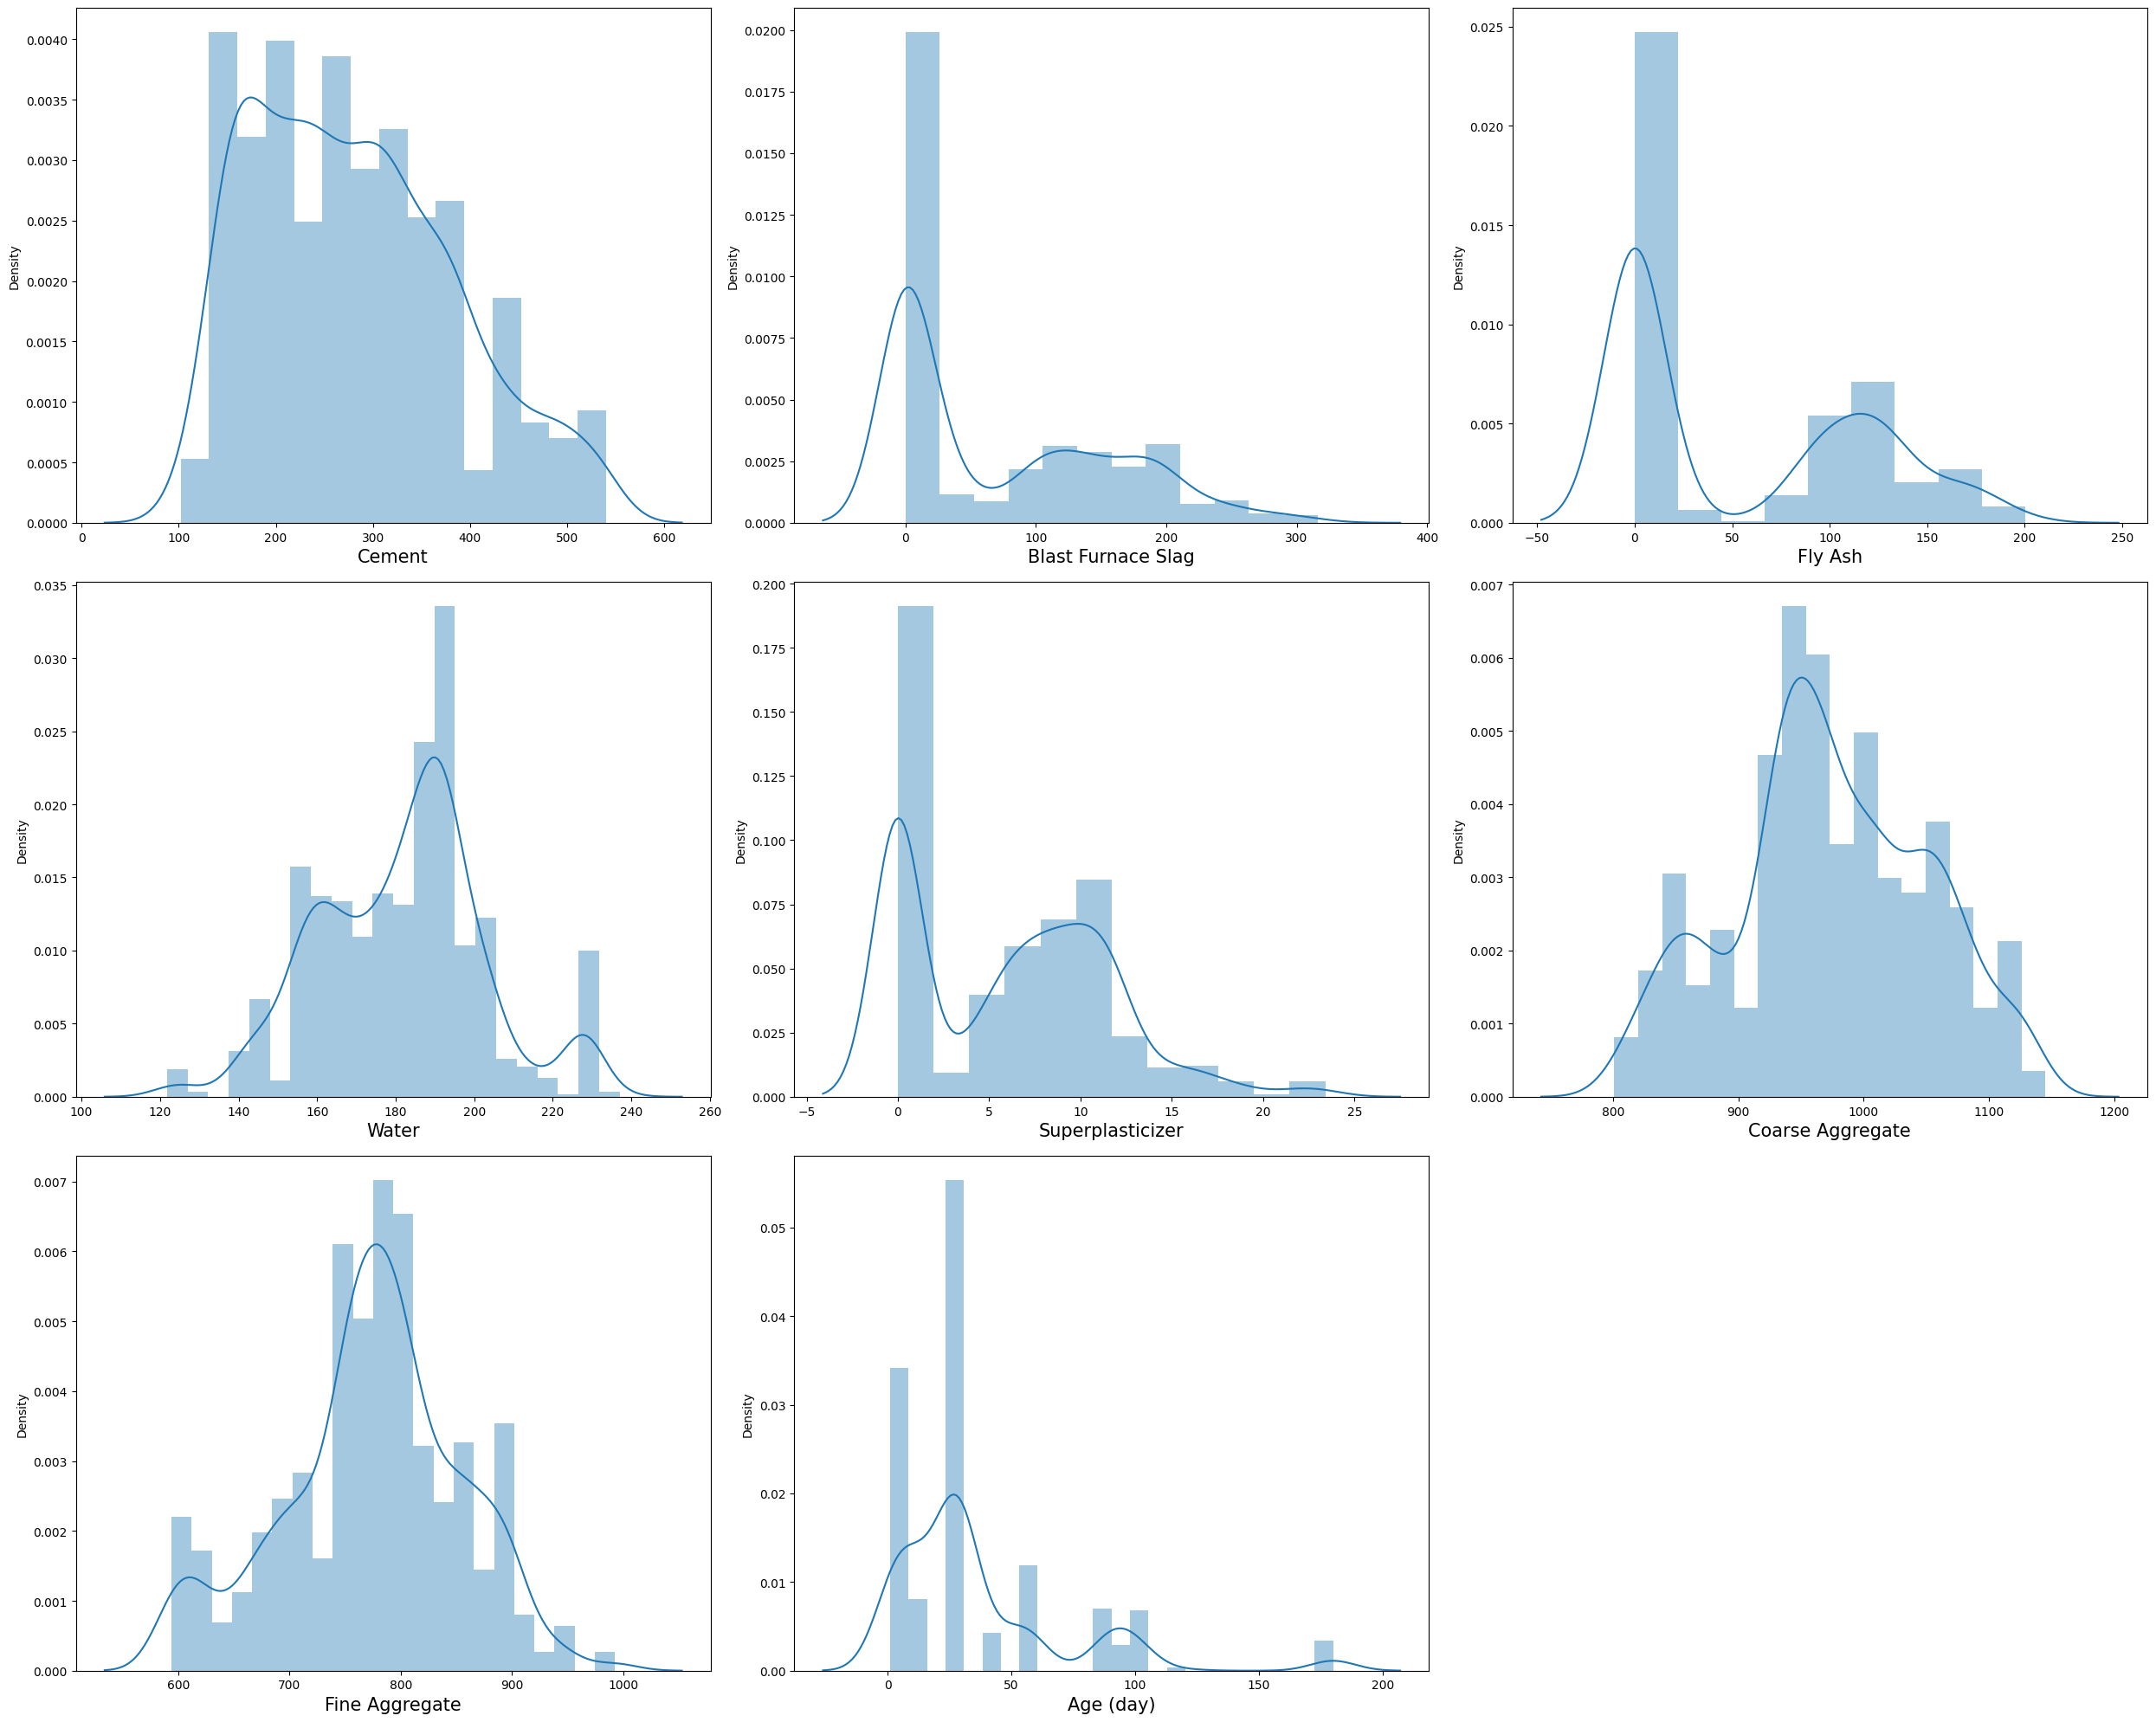

In [90]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()

plt.savefig('figures/Checking_for_normalized_data.png')
plt.show()

taking insights from distplots and variance  , our data is not good normalize , To normalize we can use logarithmic scaling method

In [91]:
for column in X.columns:
     X[column] += 1
     X[column] = np.log(X[column])

<ipython-input-91-4e26c70b9a4a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-91-4e26c70b9a4a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [92]:
X.var()

Cement                0.143939
Blast Furnace Slag    5.785867
Fly Ash               5.641045
Water                 0.013875
Superplasticizer      1.298033
Coarse Aggregate      0.006475
Fine Aggregate        0.011292
Age (day)             1.033267
dtype: float64

<ipython-input-93-ba94b7b8b88e>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-93-ba94b7b8b88e>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-93-ba94b7b8b88e>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

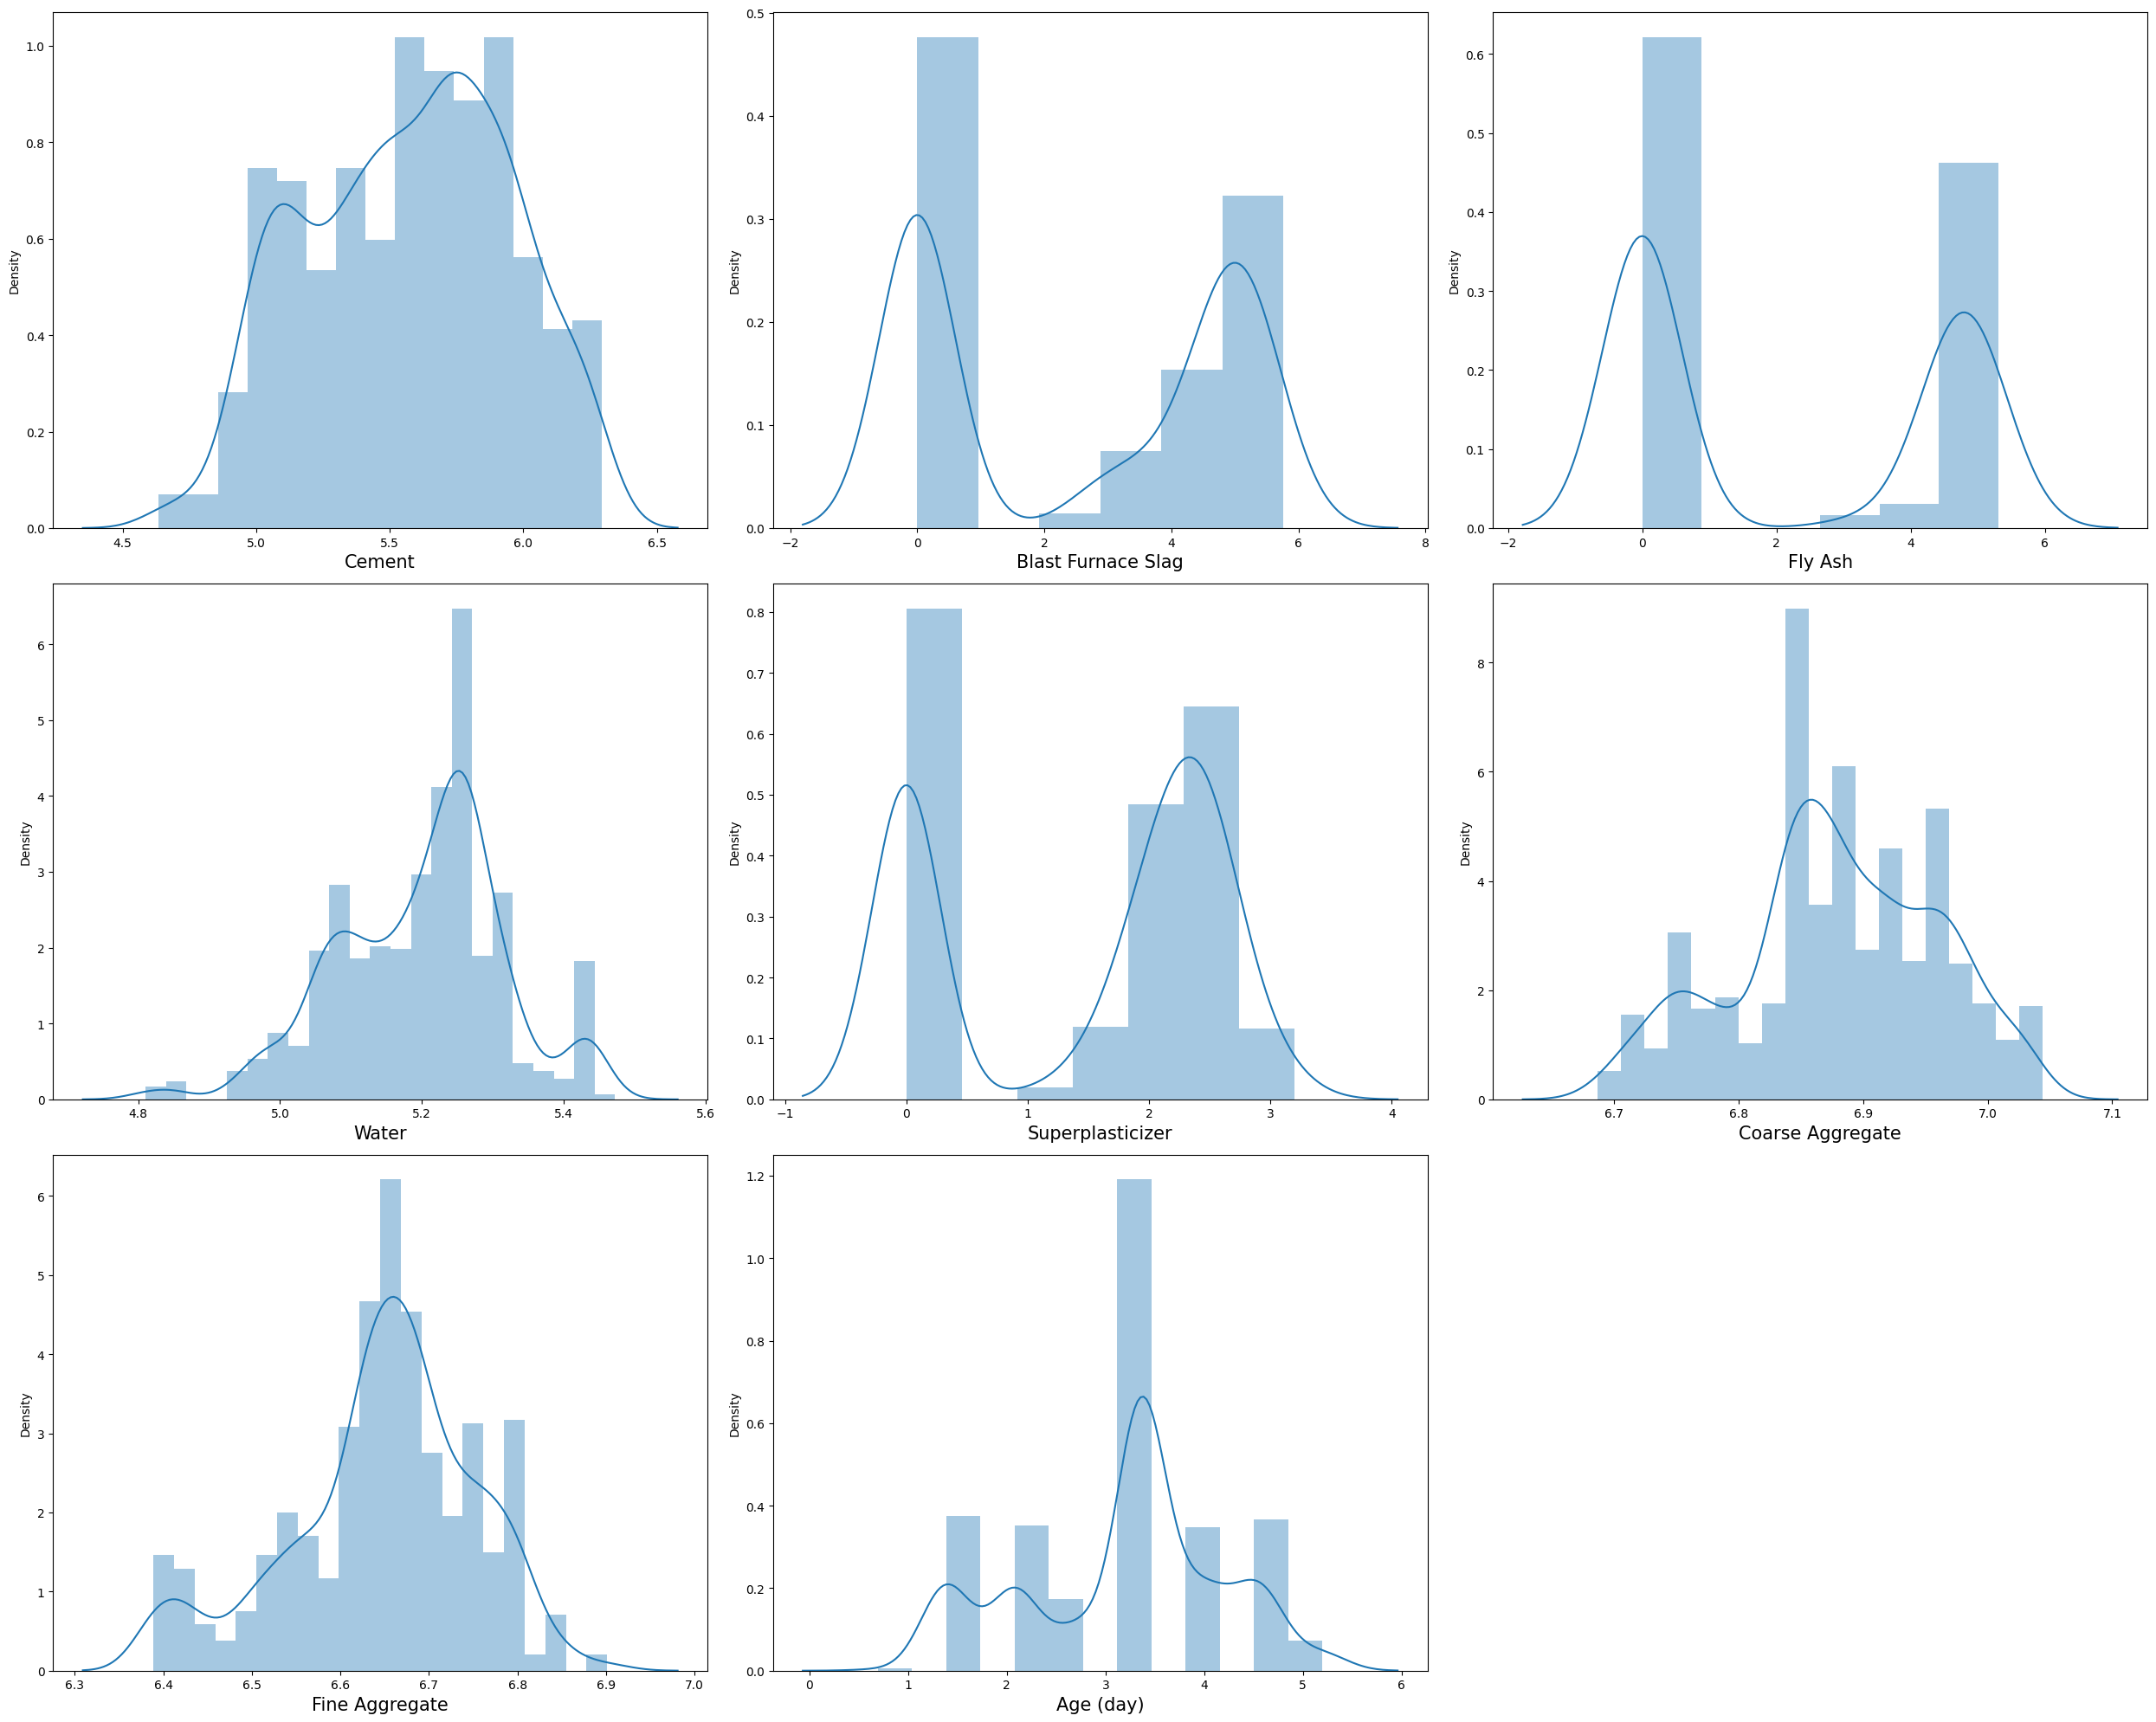

In [93]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.savefig('figures/Normalized_data.png')
plt.show()

Now data is normalized and looks good, let's check for outliers.

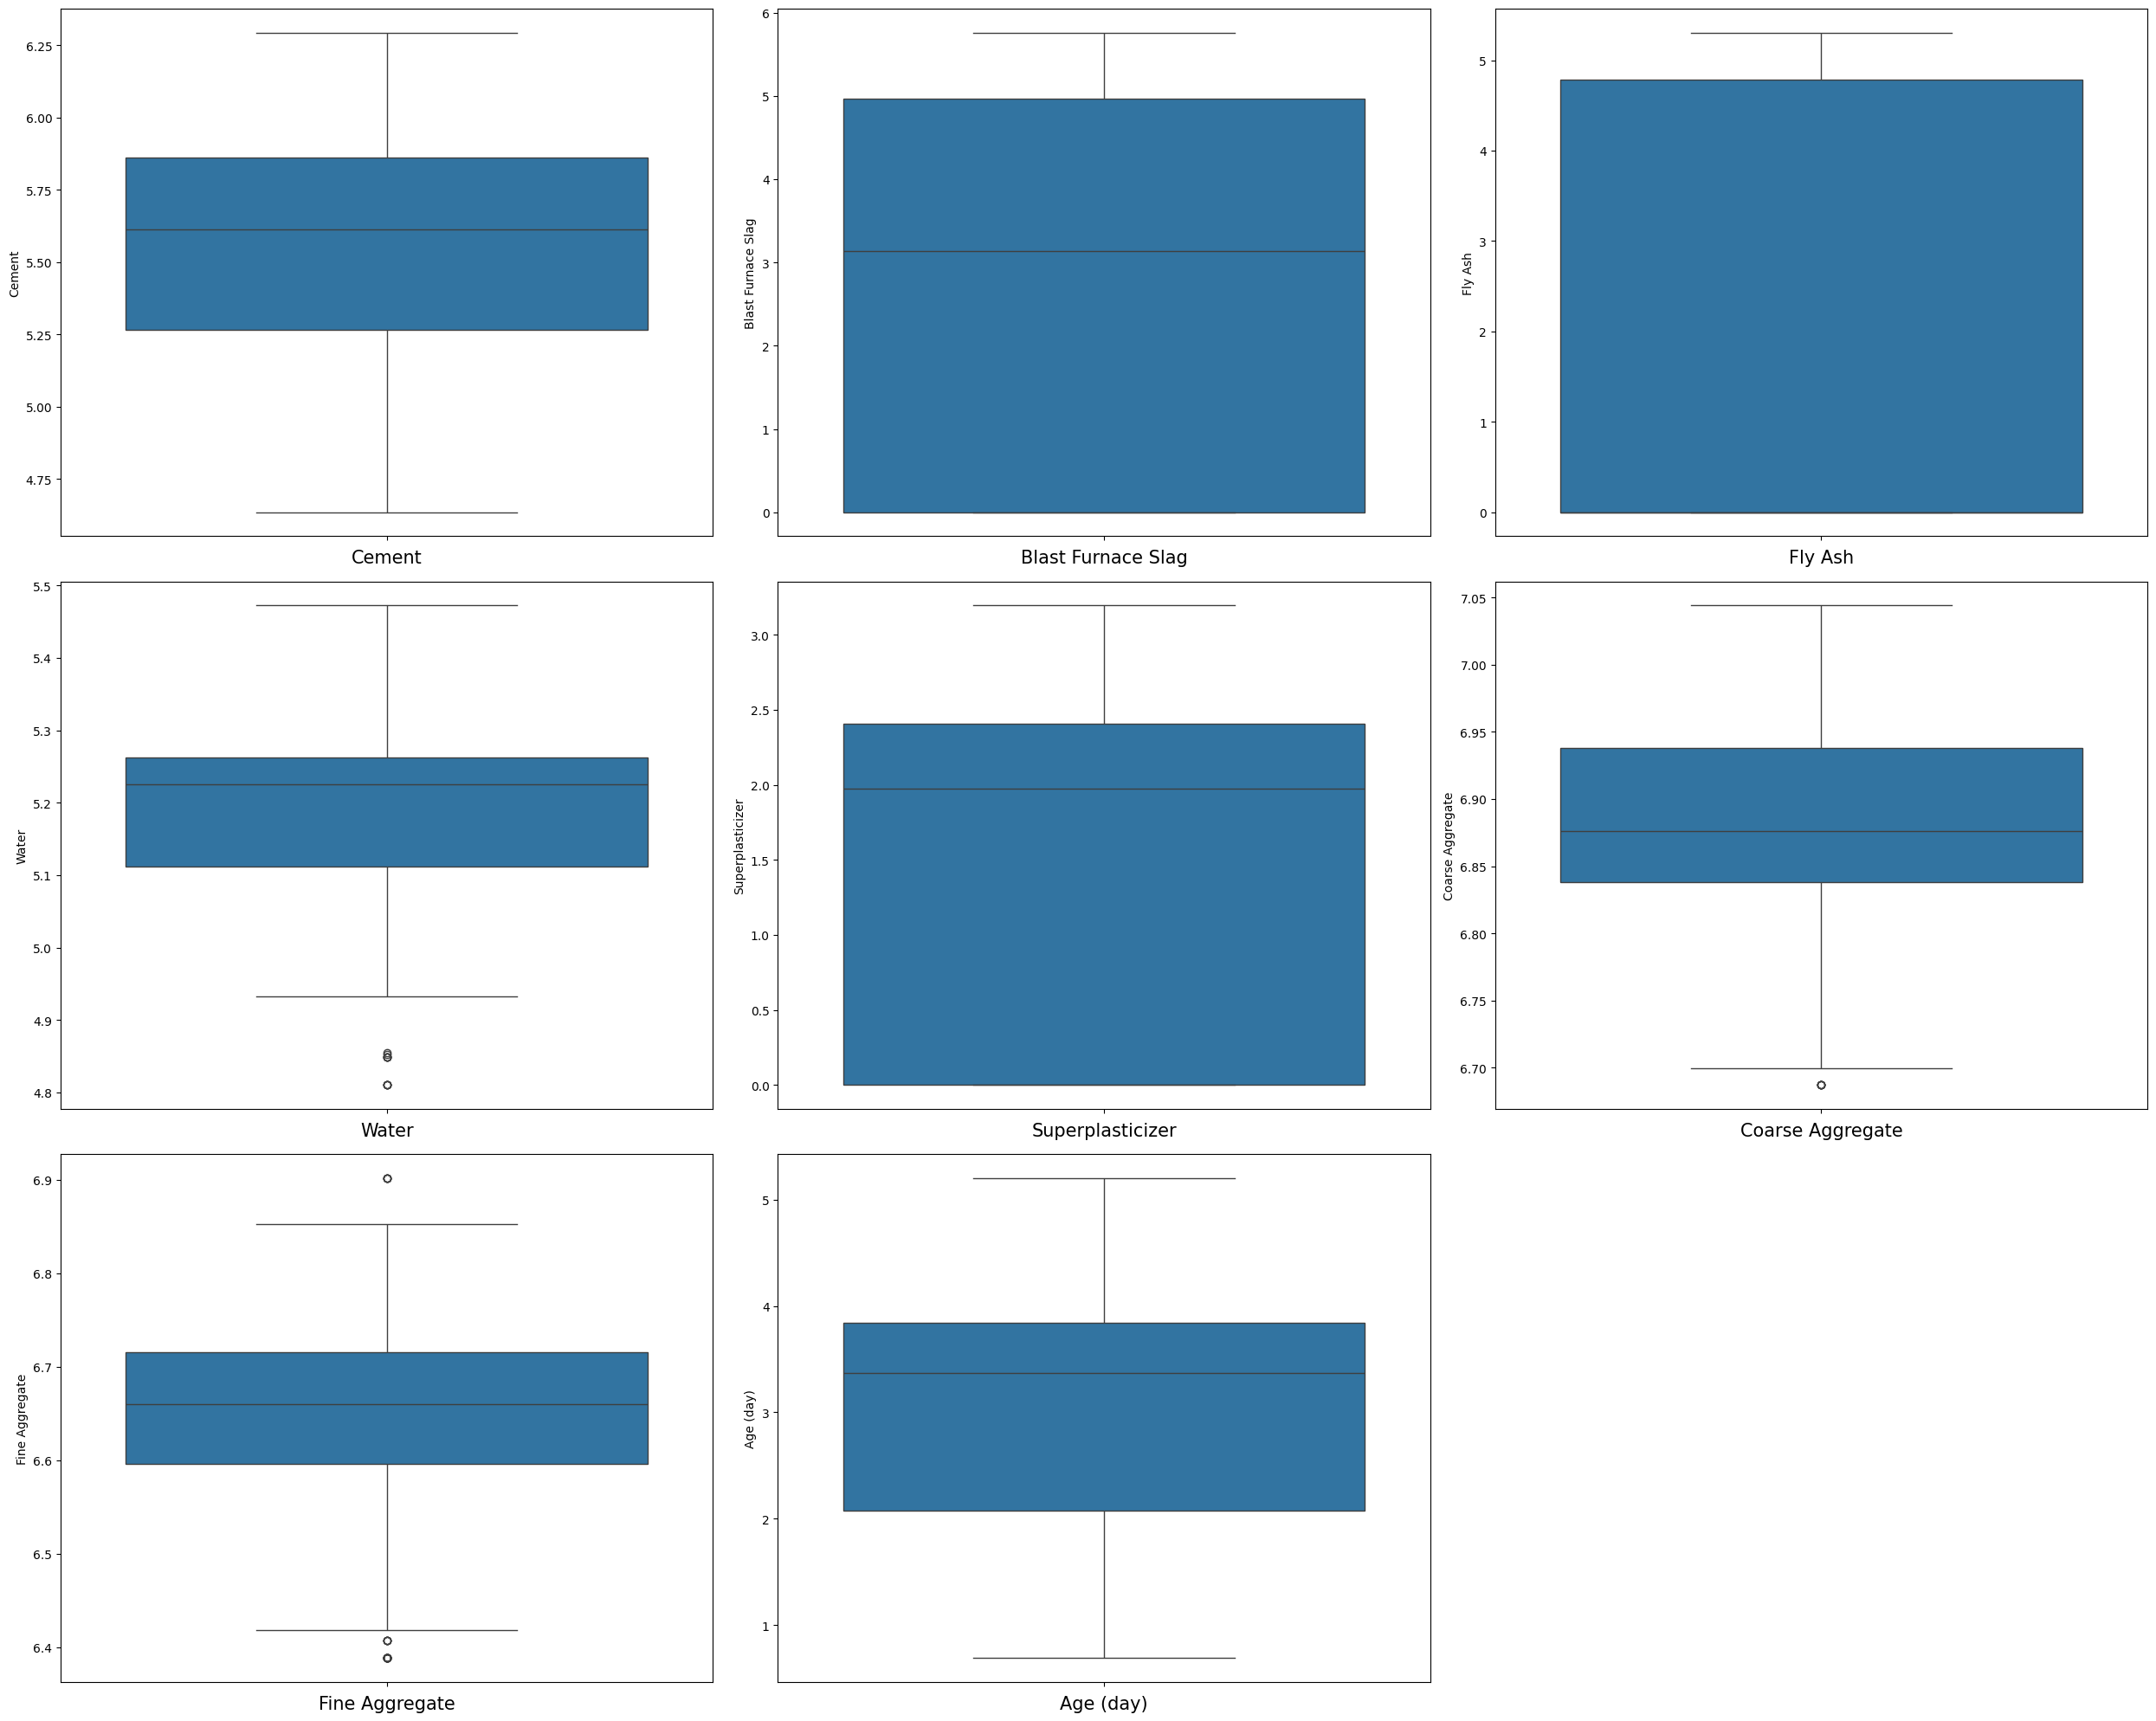

In [94]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1
plt.tight_layout()
plt.savefig('figures/Outliers_removed.png')
plt.show()

Now as we can see there are no more outliers anymore which we have seen earlier

In [95]:
# splitting data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [96]:
# scaling data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [97]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [98]:
lr.score(X_train, y_train)

0.8052413507544307

In [99]:
lr.score(X_test, y_test)

0.8067751168976546

In [100]:
from sklearn.linear_model import Lasso, LassoCV

lassocv = LassoCV(alphas = None, cv = 10, max_iter = 10000)
lassocv.fit(X_train, y_train)

lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X_train, y_train)

lasso.score(X_train, y_train)

0.8049626186834085

In [101]:
lasso.score(X_test, y_test)

0.8062347355858107

In [102]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [103]:


dtr.score(X_train, y_train)

0.9961144588874957

In [104]:

dtr.score(X_test, y_test)

0.8580783523561162

Performing hyperparameter tuning for the Decision Tree Regressor model using GridSearchCV to improve its performance.

In [105]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [106]:
rfr.score(X_train, y_train)

0.9834267899240654

In [107]:
rfr.score(X_test, y_test)

0.9199823453326261

In [108]:
from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 7, n_estimators = 200)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [109]:
xgb.score(X_train, y_train)

0.9955789980675304

In [110]:
xgb.score(X_test, y_test)

0.9388250117590742

In [111]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [112]:
gbr.score(X_train, y_train)

0.9487166478059254

In [113]:

gbr.score(X_test, y_test)


0.9127919050520534

Performing hyperparameter tuning for the Gradient Boost Regressor model using GridSearchCV to improve its performance.

In [114]:
# prompt: evaluation metrics for all models

# Evaluation Metrics for Linear Regression
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print("Mean Squared Error:", mse_lr)
print("R-squared Score:", r2_lr)

# Evaluation Metrics for Lasso Regression
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression:")
print("Mean Squared Error:", mse_lasso)
print("R-squared Score:", r2_lasso)

# Evaluation Metrics for Decision Tree Regressor
y_pred_dtr = dtr.predict(X_test)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)

print("\nDecision Tree Regressor:")
print("Mean Squared Error:", mse_dtr)
print("R-squared Score:", r2_dtr)

# Evaluation Metrics for Random Forest Regressor
y_pred_rfr = rfr.predict(X_test)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)

print("\nRandom Forest Regressor:")
print("Mean Squared Error:", mse_rfr)
print("R-squared Score:", r2_rfr)

# Evaluation Metrics for XGBoost Regressor
y_pred_xgb = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Regressor:")
print("Mean Squared Error:", mse_xgb)
print("R-squared Score:", r2_xgb)

# Evaluation Metrics for Gradient Boosting Regressor
y_pred_gbr = gbr.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("\nGradient Boosting Regressor:")
print("Mean Squared Error:", mse_gbr)
print("R-squared Score:", r2_gbr)


Linear Regression:
Mean Squared Error: 49.66374397991486
R-squared Score: 0.8067751168976546

Lasso Regression:
Mean Squared Error: 49.802635817715725
R-squared Score: 0.8062347355858107

Decision Tree Regressor:
Mean Squared Error: 36.47749844961856
R-squared Score: 0.8580783523561162

Random Forest Regressor:
Mean Squared Error: 20.566586722522697
R-squared Score: 0.9199823453326261

XGBoost Regressor:
Mean Squared Error: 15.723538838227208
R-squared Score: 0.9388250117590742

Gradient Boosting Regressor:
Mean Squared Error: 22.41471404165313
R-squared Score: 0.9127919050520534


Model Evaluation, before hyperparameter tuning best model

In [115]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost', 'XgBoost'],
    'Score' : [lr.score(X_test, y_test), lasso.score(X_test, y_test), dtr.score(X_test, y_test), rfr.score(X_test, y_test),
               gbr.score(X_test, y_test), xgb.score(X_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,XgBoost,0.938825
3,Random Forest,0.919982
4,Gradient Boost,0.912792
2,Decision Tree,0.858078
0,Linear Regression,0.806775
1,Lasso Regression,0.806235


In [116]:
#hyperparameter tuning of best model score we obtained --> XgBoost Model

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
params = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(xgb.XGBRegressor(), params, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create a new XGBoost model with the best parameters
xgb_tuned = xgb.XGBRegressor(**best_params)

# Train the tuned model on the training data
xgb_tuned.fit(X_train, y_train)

# Evaluate the tuned model on the test data
score = xgb_tuned.score(X_test, y_test)

print("Tuned XGBoost Model Score:", score)


Tuned XGBoost Model Score: 0.9492942182044313


After Getting tuning of XgBoost we can see little increase in accuracy score.



plotting scores of all models , we observe XgBoost Model gave the highest score ,it better fir than any other model

In [117]:
import plotly.express as px
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', title = 'Models Comparison')




